In this notebook, I will answer the question: "Which cities have the highest order pickups number?" and the answer to it. The answer can support the business team prioritize resources on how to expand and focus their efforts.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


In [3]:
df = pd.read_csv('./anonymized/Orders-Grid view.csv')
df.head()

,Order ID,Order Date,Shop,Pick Up Emirate,Drop Off Emirate,Drop Off Area,Delivery Company,Status,COD,Delivery Cost,Charge to Customer,Category,Delivery Route,Month - Formula,Month
0,6713.0,1/2/2021,Shop001,Abu Dhabi,Dubai,NaN,DeliveryCompany01,Cancelled/Returned,NaN,NaN,NaN,SM,Abu Dhabi to Dubai,February,February
1,3015.0,1/9/2020,Shop002,Dubai,Fujeirah,Hamad bin abdulla road,DeliveryCompany01,Cancelled/Returned,NaN,AED 0.00,AED 0.00,NaN,Dubai to Fujeirah,September,September
2,3016.0,1/9/2020,Shop003,Abu Dhabi,Al Ain,Villa 8,DeliveryCompany01,Delivered,NaN,AED 32.00,AED 45.00,NaN,Abu Dhabi to Al Ain,September,September
3,3024.0,1/9/2020,Shop004,Abu Dhabi,Ras Al Khaimah,Alkharan,DeliveryCompany01,Delivered,NaN,AED 32.00,AED 60.00,NaN,Abu Dhabi to Ras Al Khaimah,September,September
4,3022.0,1/9/2020,Shop005,Sharjah,Abu Dhabi,NaN,DeliveryCompany02,Delivered,NaN,AED 30.00,AED 45.00,NaN,Sharjah to Abu Dhabi,September,September


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order ID            4582 non-null   float64
 1   Order Date          5189 non-null   object 
 2   Shop                5189 non-null   object 
 3   Pick Up Emirate     5189 non-null   object 
 4   Drop Off Emirate    5179 non-null   object 
 5   Drop Off Area       4498 non-null   object 
 6   Delivery Company    5189 non-null   object 
 7   Status              5189 non-null   object 
 8   COD                 1475 non-null   object 
 9   Delivery Cost       4202 non-null   object 
 10  Charge to Customer  4278 non-null   object 
 11  Category            4523 non-null   object 
 12  Delivery Route      5189 non-null   object 
 13  Month - Formula     5189 non-null   object 
 14  Month               5189 non-null   object 
dtypes: float64(1), object(14)
memory usage: 608.2+ KB


In [5]:
#fixing the data type of Order Date
df['Order Date']= pd.to_datetime(df['Order Date'],format='%d/%m/%Y', errors='raise') 

# Determining what is the highest pick up emirate of orders


Text(0, 0.5, 'Number of Orders')

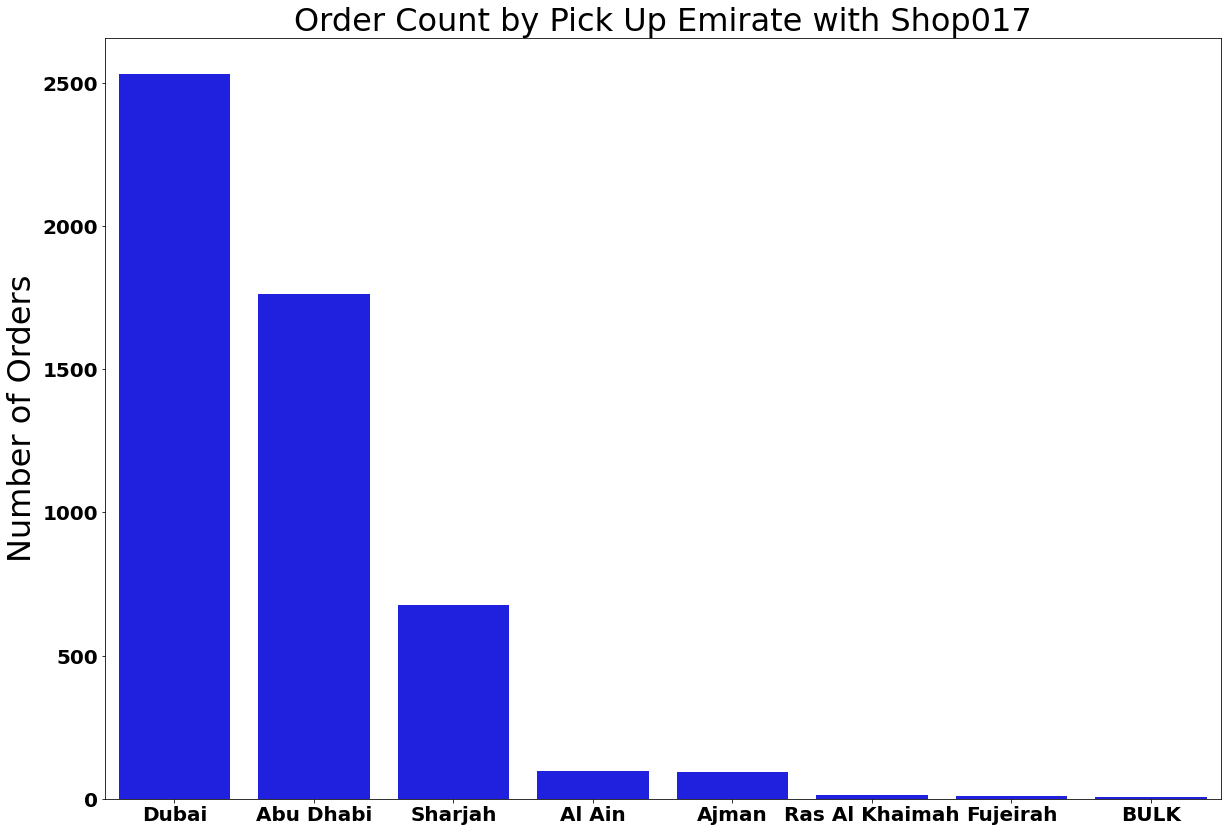

In [20]:
rc={'axes.labelsize': 32, 'font.size': 20, 'font.weight':'bold', 'legend.fontsize': 32.0, 'axes.titlesize': 32, "figure.figsize": (20, 14)}
sns.set_context(rc)

pick_up_emirates_value_counts = df["Pick Up Emirate"].value_counts(dropna=False)
ax = sns.barplot(x = pick_up_emirates_value_counts.index, y = pick_up_emirates_value_counts.values , color = "blue")
ax.set_title('Order Count by Pick Up Emirate with Shop017')
ax.set_ylabel("Number of Orders")



### Since we have seen from previous notebooks that Shop017 holds maybe 30% of all orders, let's see how these charts change when we remove Shop017 from the analysis

Text(0, 0.5, 'Number of Orders')

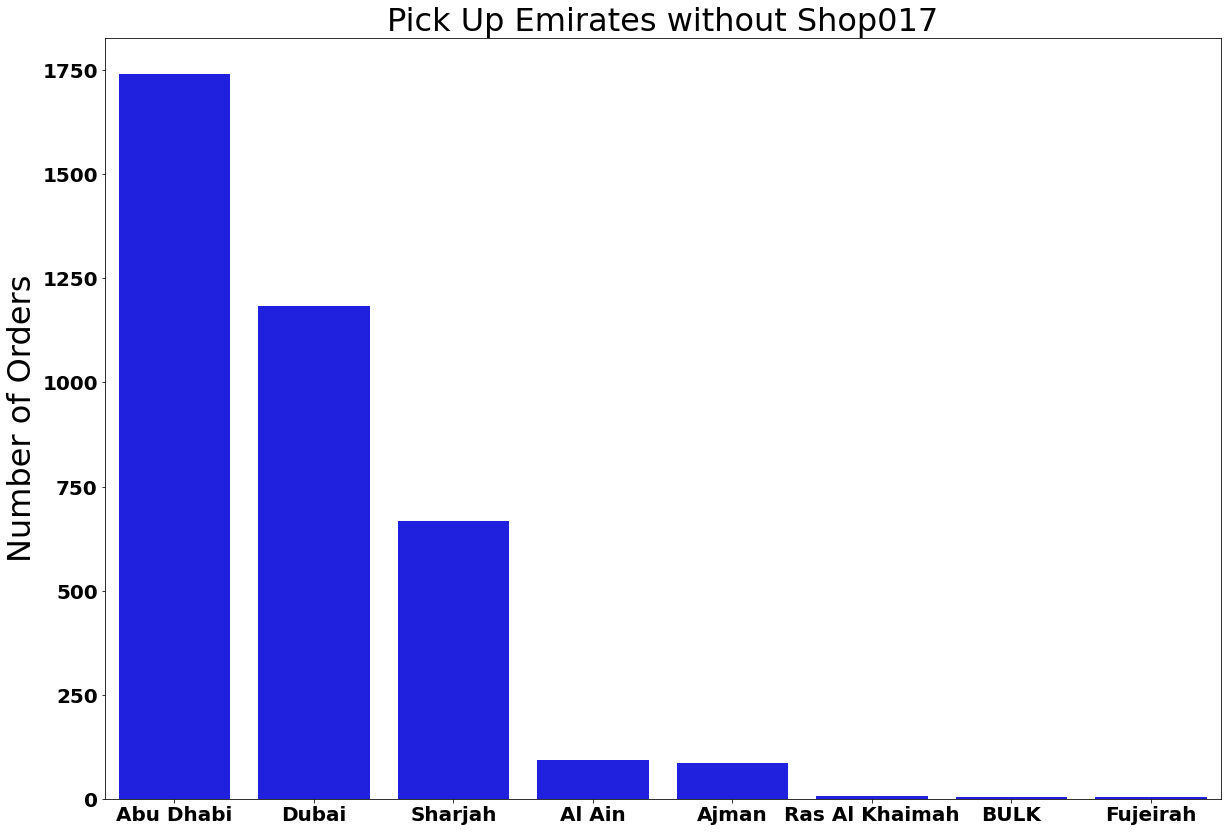

In [22]:

pick_up_emirates_value_counts = df[df['Shop'] != 'Shop017']["Pick Up Emirate"].value_counts(dropna=False)
ax = sns.barplot(x = pick_up_emirates_value_counts.index, y = pick_up_emirates_value_counts.values , color = "blue")
ax.set_title('Pick Up Emirates without Shop017')
ax.set_ylabel("Number of Orders")